# Trementum Data Analyst Test

#### Merge the data

For this case, I find it more convenient to use csv files, but the representation of the data merging in SQL looks like this:

WITH accounts_followers AS (
    SELECT a.*, s.followers_count
    FROM accounts a
    LEFT JOIN sources_for_followers s ON a._id = s._id
)

SELECT p.*, af.username, af.full_name, af.description, af.is_verified, af.restricted, af.followers_count
FROM posts p
LEFT JOIN accounts_followers af ON p.profile_id = af.id;


Let's import our data from .csv files and taking a quick look at their structures.

In [155]:
import pandas as pd

In [156]:
# Load the CSV files
accounts_df = pd.read_csv("accounts.csv")
posts_df = pd.read_csv("posts.csv")
followers_df = pd.read_csv("sources_for_followers.csv")

# Display the heads of df`s
accounts_head = accounts_df.head()
posts_head = posts_df.head()
followers_head = followers_df.head()

accounts_head, posts_head, followers_head

(                id         username                full_name  \
 0  100063695660293       ukraina.ru               Украина.ру   
 1  144698628932572       tassagency                     ТАСС   
 2  114460923709287      4media.INFO              4media.INFO   
 3  100044386691134  ing.milan.uhrik  Milan Uhrík • Republika   
 4  100063477739510    tsoncho.ganev              Цончо Ганев   
 
                                          description is_verified  restricted  \
 0   Информационно-аналитическое издание «Украина.ру»       False         NaN   
 1  Информационное агентство России "ТАСС" - Крупн...        True         NaN   
 2  4MEDIA.INFO este un proiect media independent ...       False         NaN   
 3  Ing. Milan Uhrík, PhD. - predseda hnutia REPUB...       False         NaN   
 4                Заместник-председател на Възраждане        True         NaN   
 
    _id     _status        id_alt  
 0  378  downloaded           NaN  
 1  364  downloaded           NaN  
 2  319  dow

We can see that in the posts df we can use the profile_id column to connect to the accounts table. Also, we can connect the number of followers by the _id columns

In [157]:
posts_df = posts_df.rename(columns={'id': 'post_id'})

In [158]:
# Merge accounts_df and followers_df
# Merge using the primary ID (profile_id and id)
accounts_df = pd.merge(accounts_df, followers_df, left_on='_id', right_on='_id', how='left')
primary_merge = pd.merge(posts_df, accounts_df, left_on='profile_id', right_on='id', how='left', indicator=True)
primary_merge

,post_id,created_time,profile_id,text_original,comments_count,id,username,full_name,description,is_verified,restricted,_id,_status,id_alt,followers_count,_merge
0,2318039031731205,2023-04-24 12:29:35+00,100068846905135,Smerenia pleacă din inima ta,0,1.000688e+14,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0,both
1,2318026655065776,2023-04-24 12:07:02+00,100068846905135,# Sfântul în Arsenie Boca # Nu ignora puneţi o...,22,1.000688e+14,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0,both
2,2318008095067632,2023-04-24 11:35:01+00,100068846905135,🙏❤️Hristos a purtat crucea ca orice suflet car...,7,1.000688e+14,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0,both
3,2317991458402629,2023-04-24 10:58:15+00,100068846905135,🙏💖Cea mai frumoasă rugăciune，Fie ca família ta...,16,1.000688e+14,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0,both
4,2317968635071578,2023-04-24 10:06:35+00,100068846905135,# **va fi una dintre zilele minunate din viața...,10,1.000688e+14,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,201568522665015,2023-04-22 10:50:01+00,100064898132087,Sikerrel véget ért az érintettek evakuálása!,0,1.000649e+14,ambrusitalia,Ambasciata della Federazione Russa in Italia /...,Il profilo ufficiale dell'Ambasciata della Fed...,True,NaN,603.0,downloaded,NaN,38000.0,both
1134,201544182667449,2023-04-22 09:59:59+00,100064898132087,Belgrádban tárgyalt Orbán Viktor miniszterelnö...,0,1.000649e+14,ambrusitalia,Ambasciata della Federazione Russa in Italia /...,Il profilo ufficiale dell'Ambasciata della Fed...,True,NaN,603.0,downloaded,NaN,38000.0,both
1135,201528426002358,2023-04-22 09:17:23+00,100064898132087,(18+),1,1.000649e+14,ambrusitalia,Ambasciata della Federazione Russa in Italia /...,Il profilo ufficiale dell'Ambasciata della Fed...,True,NaN,603.0,downloaded,NaN,38000.0,both
1136,201497592672108,2023-04-22 07:57:01+00,100064898132087,Jelentősen csökkent a gáz- és az áramfogyasztá...,1,1.000649e+14,ambrusitalia,Ambasciata della Federazione Russa in Italia /...,Il profilo ufficiale dell'Ambasciata della Fed...,True,NaN,603.0,downloaded,NaN,38000.0,both


As we see there are N/A values in merged dfs, let`s also merge these N/A values by id_alt column

In [159]:
# Identify rows that didn't find a match in the primary merge
no_match = primary_merge[primary_merge['_merge'] == 'left_only']
no_match = no_match.drop(columns=['id', '_merge']).iloc[:,:-9]
no_match

,post_id,created_time,profile_id,text_original,comments_count
663,1889608421416359,2023-04-24 11:54:02+00,100064478088503,Extrablatt aus dem „Haus Seelenfrieden“ Die Sc...,0
664,1889576508086217,2023-04-24 10:38:58+00,100064478088503,Und die scheiss Bullen machen nix.,1
665,188917491145971,2023-04-23 17:49:48+00,100064478088503,Wenn das wahr ist....,2
666,1888958271481374,2023-04-23 10:17:36+00,100064478088503,Wer bezahlt eigentlich die Rückabwicklung dies...,0
667,1888943874816147,2023-04-23 09:41:46+00,100064478088503,S U C H E dringend eine ärztliche P R A X I S ...,0
...,...,...,...,...,...
1094,757122615771771,2023-03-10 06:47:32+00,2212856535602171,Orbán Viktor: Amíg külföldről finanszírozzák a...,26
1095,757089129108453,2023-03-10 05:04:52+00,2212856535602171,Litván katonai hírszerzés: Oroszország erőforr...,14
1096,756800695803963,2023-03-09 15:28:57+00,2212856535602171,"🤯Ezt már tényleg nem hiszem el! Azok után, hog...",162
1097,756751972475502,2023-03-09 13:45:09+00,2212856535602171,"👋Már közel 11 ezren követtek a TikTokon, itt a...",21


In [160]:
# Merge rows without a primary match using the alternative ID (profile_id and id_alt)
alt_merge = pd.merge(no_match, accounts_df, left_on='profile_id', right_on='id_alt', how='left')
alt_merge

,post_id,created_time,profile_id,text_original,comments_count,id,username,full_name,description,is_verified,restricted,_id,_status,id_alt,followers_count
0,1889608421416359,2023-04-24 11:54:02+00,100064478088503,Extrablatt aus dem „Haus Seelenfrieden“ Die Sc...,0,159564110726533,1tvnews,Новости Первого канала,NaN,True,NaN,309,downloaded,1.000645e+14,781400
1,1889576508086217,2023-04-24 10:38:58+00,100064478088503,Und die scheiss Bullen machen nix.,1,159564110726533,1tvnews,Новости Первого канала,NaN,True,NaN,309,downloaded,1.000645e+14,781400
2,188917491145971,2023-04-23 17:49:48+00,100064478088503,Wenn das wahr ist....,2,159564110726533,1tvnews,Новости Первого канала,NaN,True,NaN,309,downloaded,1.000645e+14,781400
3,1888958271481374,2023-04-23 10:17:36+00,100064478088503,Wer bezahlt eigentlich die Rückabwicklung dies...,0,159564110726533,1tvnews,Новости Первого канала,NaN,True,NaN,309,downloaded,1.000645e+14,781400
4,1888943874816147,2023-04-23 09:41:46+00,100064478088503,S U C H E dringend eine ärztliche P R A X I S ...,0,159564110726533,1tvnews,Новости Первого канала,NaN,True,NaN,309,downloaded,1.000645e+14,781400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,757122615771771,2023-03-10 06:47:32+00,2212856535602171,Orbán Viktor: Amíg külföldről finanszírozzák a...,26,100044563410651,george.simion.unire,George Simion,ROMÂNIA MARE ÎN EUROPA!,True,NaN,598,downloaded,2.212857e+15,1200000
113,757089129108453,2023-03-10 05:04:52+00,2212856535602171,Litván katonai hírszerzés: Oroszország erőforr...,14,100044563410651,george.simion.unire,George Simion,ROMÂNIA MARE ÎN EUROPA!,True,NaN,598,downloaded,2.212857e+15,1200000
114,756800695803963,2023-03-09 15:28:57+00,2212856535602171,"🤯Ezt már tényleg nem hiszem el! Azok után, hog...",162,100044563410651,george.simion.unire,George Simion,ROMÂNIA MARE ÎN EUROPA!,True,NaN,598,downloaded,2.212857e+15,1200000
115,756751972475502,2023-03-09 13:45:09+00,2212856535602171,"👋Már közel 11 ezren követtek a TikTokon, itt a...",21,100044563410651,george.simion.unire,George Simion,ROMÂNIA MARE ÎN EUROPA!,True,NaN,598,downloaded,2.212857e+15,1200000


In [161]:
# Concatenate the primary matched data with the alternative matched data
merged_data_alternative = pd.concat([primary_merge[primary_merge['_merge'] == 'both'].drop(columns='_merge'), alt_merge])

# Display the head of the merged data to verify
merged_data_alternative_head = merged_data_alternative
merged_data_alternative_head

,post_id,created_time,profile_id,text_original,comments_count,id,username,full_name,description,is_verified,restricted,_id,_status,id_alt,followers_count
0,2318039031731205,2023-04-24 12:29:35+00,100068846905135,Smerenia pleacă din inima ta,0,1.000688e+14,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0
1,2318026655065776,2023-04-24 12:07:02+00,100068846905135,# Sfântul în Arsenie Boca # Nu ignora puneţi o...,22,1.000688e+14,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0
2,2318008095067632,2023-04-24 11:35:01+00,100068846905135,🙏❤️Hristos a purtat crucea ca orice suflet car...,7,1.000688e+14,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0
3,2317991458402629,2023-04-24 10:58:15+00,100068846905135,🙏💖Cea mai frumoasă rugăciune，Fie ca família ta...,16,1.000688e+14,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0
4,2317968635071578,2023-04-24 10:06:35+00,100068846905135,# **va fi una dintre zilele minunate din viața...,10,1.000688e+14,russembangola,Embaixada da Federação da Rússia na República ...,A página oficial da Embaixada da Rússia em Ang...,True,NaN,3.0,downloaded,NaN,26000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,757122615771771,2023-03-10 06:47:32+00,2212856535602171,Orbán Viktor: Amíg külföldről finanszírozzák a...,26,1.000446e+14,george.simion.unire,George Simion,ROMÂNIA MARE ÎN EUROPA!,True,NaN,598.0,downloaded,2.212857e+15,1200000.0
113,757089129108453,2023-03-10 05:04:52+00,2212856535602171,Litván katonai hírszerzés: Oroszország erőforr...,14,1.000446e+14,george.simion.unire,George Simion,ROMÂNIA MARE ÎN EUROPA!,True,NaN,598.0,downloaded,2.212857e+15,1200000.0
114,756800695803963,2023-03-09 15:28:57+00,2212856535602171,"🤯Ezt már tényleg nem hiszem el! Azok után, hog...",162,1.000446e+14,george.simion.unire,George Simion,ROMÂNIA MARE ÎN EUROPA!,True,NaN,598.0,downloaded,2.212857e+15,1200000.0
115,756751972475502,2023-03-09 13:45:09+00,2212856535602171,"👋Már közel 11 ezren követtek a TikTokon, itt a...",21,1.000446e+14,george.simion.unire,George Simion,ROMÂNIA MARE ÎN EUROPA!,True,NaN,598.0,downloaded,2.212857e+15,1200000.0


#### Exploratory data analysis

Let`s check for the missing (null) data in columns

In [162]:
# Check for missing values in the columns
missing_data = merged_data_alternative[merged_data_alternative.columns].isnull().sum()
missing_data

post_id               0
created_time          0
profile_id            0
text_original         0
comments_count        0
id                    0
username             78
full_name             0
description          78
is_verified         117
restricted         1138
_id                   0
_status               0
id_alt             1021
followers_count       0
dtype: int64

From the missing data check there are missing username and description for 78 posts
Overall, the data looks good, except for 2 missing usernames

Now lets build the graph to show the distribution of posts over time:

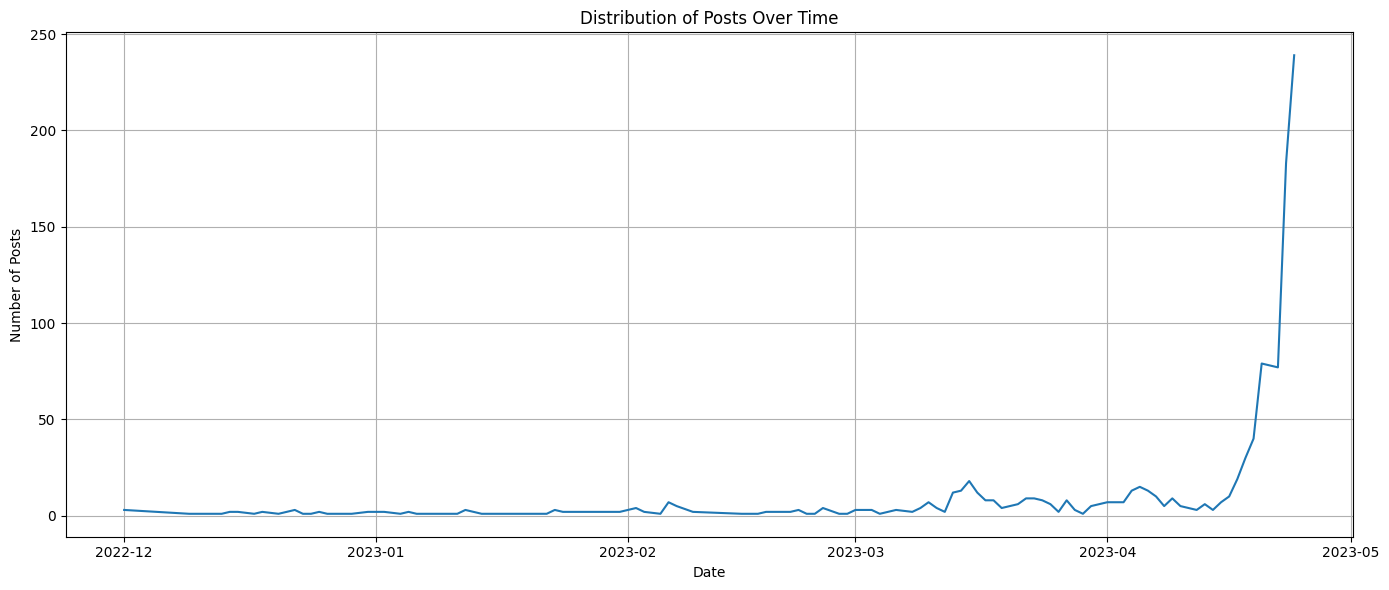

In [163]:
import matplotlib.pyplot as plt

# Convert the 'created_time' column to datetime format
merged_data_alternative['created_time'] = pd.to_datetime(merged_data_alternative['created_time'])

# Extract the date from 'created_time' for better visualization
merged_data_alternative['created_date'] = merged_data_alternative['created_time'].dt.date

# Plot the distribution of posts over time
post_counts_per_day = merged_data_alternative.groupby('created_date').size()

plt.figure(figsize=(14, 6))
post_counts_per_day.plot()
plt.title('Distribution of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.tight_layout()
plt.show()


The graph shows that the data is most complete after the second half of April 2023

#### Look for insights and provide data sample of overperforming posts

To identify overperforming posts we consider posts with engagement > 1.5 (it`s just random coefficient) times the average

In [164]:
average_comments_count = merged_data_alternative_head['comments_count'].mean()
overperforming_posts = merged_data_alternative_head[merged_data_alternative_head['comments_count'] > 1.5 * average_comments_count]

overperforming_posts_df = overperforming_posts[['post_id', 'username', 'profile_id', 'created_time', 'comments_count']]

overperforming_posts_df


,post_id,username,profile_id,created_time,comments_count
1,2318026655065776,russembangola,100068846905135,2023-04-24 12:07:02+00:00,22
9,2317913018410473,russembangola,100068846905135,2023-04-24 07:47:14+00:00,58
10,2317884025080039,russembangola,100068846905135,2023-04-24 06:35:45+00:00,30
11,2317863175082124,russembangola,100068846905135,2023-04-24 05:46:24+00:00,98
16,2317825778419197,russembangola,100068846905135,2023-04-24 04:27:08+00:00,73
...,...,...,...,...,...
110,757296659087700,george.simion.unire,2212856535602171,2023-03-10 14:12:16+00:00,58
112,757122615771771,george.simion.unire,2212856535602171,2023-03-10 06:47:32+00:00,26
114,756800695803963,george.simion.unire,2212856535602171,2023-03-09 15:28:57+00:00,162
115,756751972475502,george.simion.unire,2212856535602171,2023-03-09 13:45:09+00:00,21


For a better perception of the number of audience interactions with accounts, let's build a bar chart

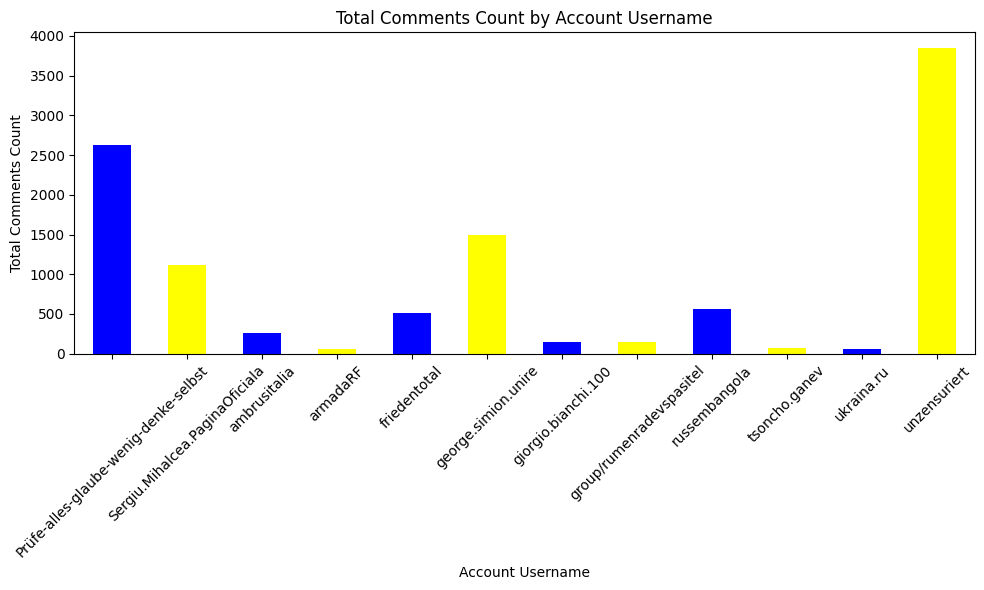

In [165]:
grouped_data = overperforming_posts_df.groupby('username').comments_count.sum()
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color=['blue', 'yellow'])
plt.title('Total Comments Count by Account Username')
plt.xlabel('Account Username')
plt.ylabel('Total Comments Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In conclusion, we analysed the dataset of audience interaction with Facebook posts. We found some empty usernames that could affect further analysis. As a result, we got a graph of the most active interaction of users with posts by specific users